In [3]:
import os
import librosa
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
from dotenv import load_dotenv

In [4]:
# 指定 STFT 參數
load_dotenv()
sample_rate = int(os.getenv('sample_rate'))
n_mels = int(os.getenv('n_mels'))
# n_fft = int(os.getenv('n_fft'))

print(f'Sample rate: {sample_rate}, n_mels: {n_mels}')

Sample rate: 48000, n_mels: 128


In [5]:
def load_segmented_files(directory):
    wav_files = []
    leak_wav_files = []
    # count = 10
    for dir in os.listdir(directory):
        if dir.endswith('no-leak'):
            continue
        for file in os.listdir(os.path.join(directory, dir)):
            # if count == 0:
            #     break
            if not file.endswith(".wav"):
                continue
            file_path = os.path.join(directory, dir, file)
            y, sr = librosa.load(file_path, sr=None)
            # print(f'Loaded file: {file_path}, shape: {y.shape}, sample rate: {sr}')
            filename = f'{dir}_{file}'
            if dir.endswith('no-leak'):
                wav_files.append((y, filename))
            else:
                leak_wav_files.append((y, filename))
            # count -= 1
    return wav_files, leak_wav_files

In [6]:
normal, leak = load_segmented_files('training_data')


In [7]:
from convert_mel_spectrogram import compute_stft_spectrogram

def convert_to_stft_spectrogram(audio, sr):
    stft_spectrogram, stft_spectrogram_db, hop_length = compute_stft_spectrogram(audio, sr, n_fft=512)
    return stft_spectrogram_db

Number of leak segments: 2076
Audio data shape: (96000,), filename: leak_ITRI0003002_rate_50_2022-06-09T114028.wav
Mel spectrogram shape: (257, 751)


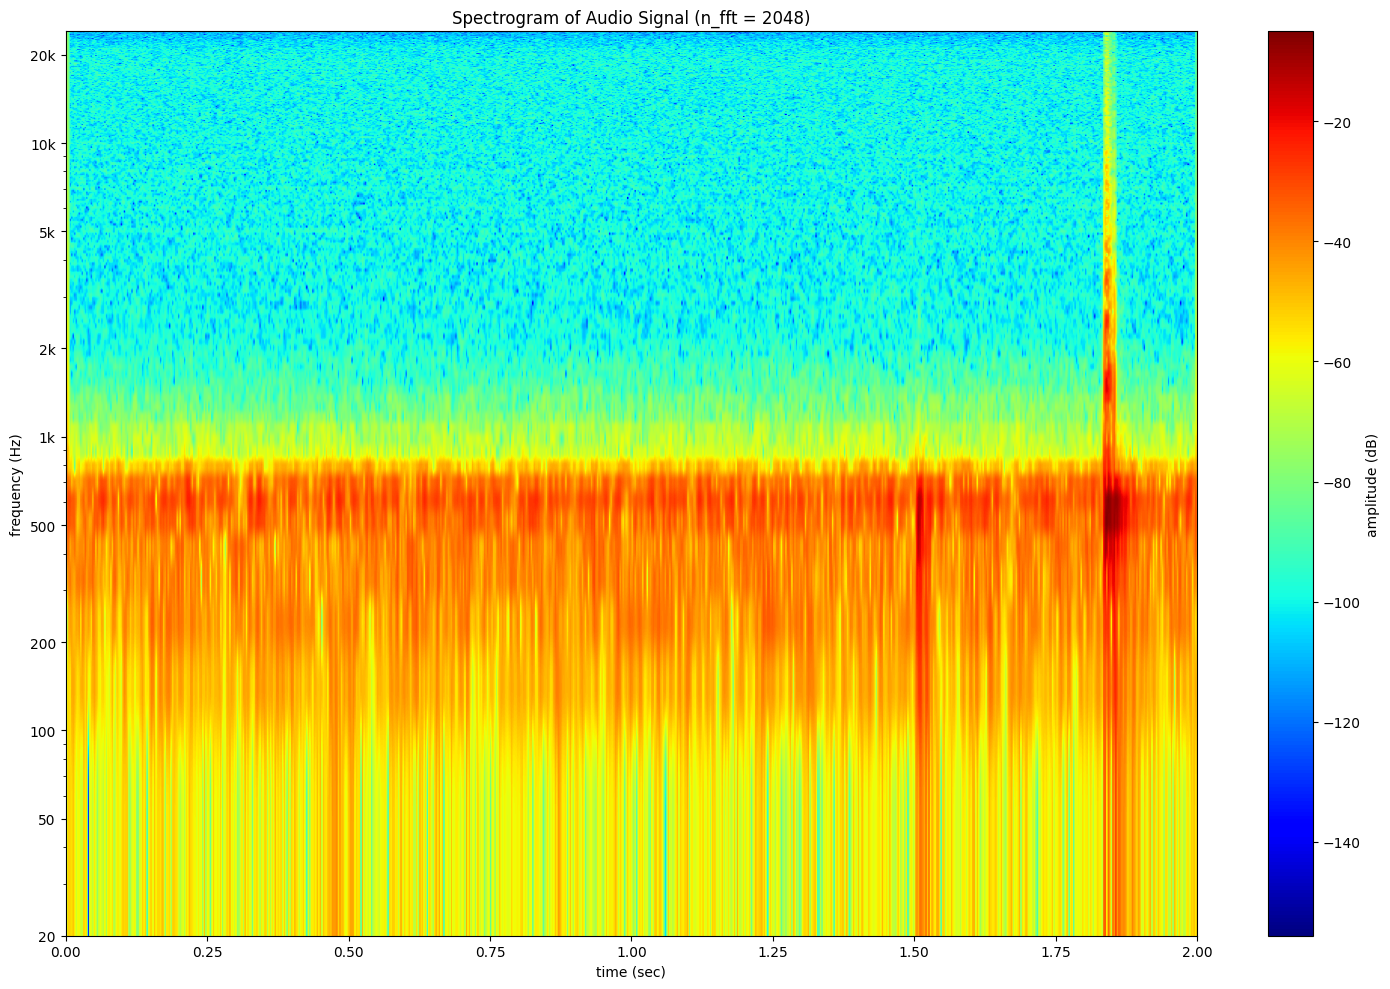

In [8]:
from convert_mel_spectrogram import plot_stft_spectrogram

print(f'Number of leak segments: {len(leak)}')
audio_data, filename = leak[3]
print(f'Audio data shape: {audio_data.shape}, filename: {filename}')
mel_spectrogram, mel_spectrogram_db, hop_length = compute_stft_spectrogram(audio_data, sample_rate, n_fft=512)
print(f"Mel spectrogram shape: {mel_spectrogram_db.shape}")
plot_stft_spectrogram(mel_spectrogram, mel_spectrogram_db, hop_length=hop_length, sample_rate=sample_rate, save_file=False, camp='jet') 

In [9]:
import IPython.display as display
display.Audio(audio_data, rate=sample_rate)

In [10]:
def wav2mfcc(wave, max_pad_len=11):
    wave = np.array(wave, order='F')
    
    # 明確地以關鍵字形式傳遞參數 y 和 sr
    mfcc = librosa.feature.mfcc(y=wave, sr=sample_rate)
    
    if mfcc.shape[1] > max_pad_len:
        mfcc = mfcc[:, :max_pad_len]
    else:
        pad_width = max_pad_len - mfcc.shape[1]
        mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mfcc

In [11]:
mfcc = wav2mfcc(audio_data)

In [12]:
def plot_mfcc(mfcc):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', cmap='cool')
    plt.colorbar()
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

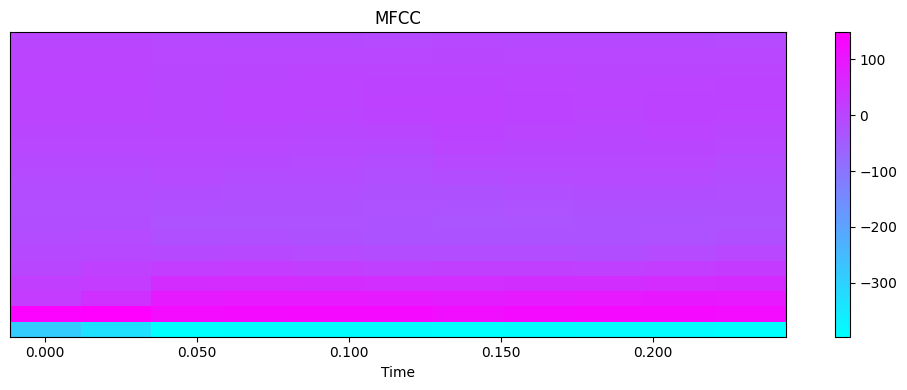

In [13]:
plot_mfcc(mfcc)